<a href="https://colab.research.google.com/github/Tharunyasri-10/data_visualization-IPL-Score-prediction/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('ipl_data.csv')
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [ ]:
data.dtypes

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


In [ ]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {data.shape}')
data = data.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {data.shape}')
data.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
print(f'Before Removing Inconsistent Teams : {data.shape}')
data = data[(data['bat_team'].isin(const_teams)) & (data['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {data.shape}')
print(f"Consistent Teams : \n{data['bat_team'].unique()}")
data.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
print(f'Before Removing Overs : {data.shape}')
data = data[data['overs'] >= 5.0]
print(f'After Removing Overs : {data.shape}')
data.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


<ipython-input-10-8eecfb991f86>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


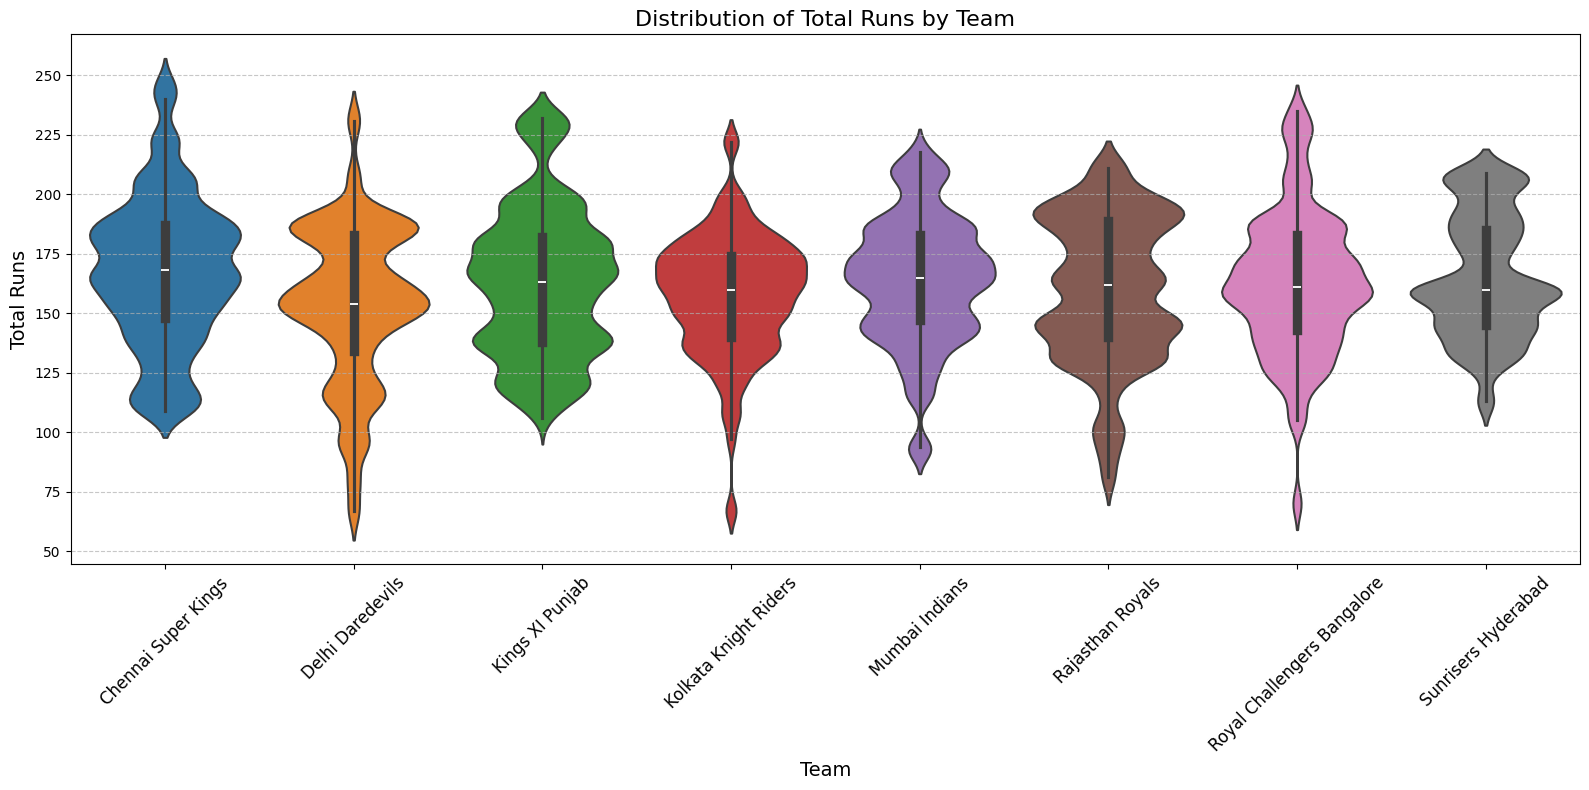

In [ ]:
# Ensure 'total' column is numeric and 'team' column is categorical
data['total'] = pd.to_numeric(data['total'], errors='coerce')
data['bat_team'] = data['bat_team'].astype('category')

# Plot the violin plot
plt.figure(figsize=(16, 8))
sns.violinplot(
    x='bat_team',
    y='total',
    data=data,
    palette='tab10',  # Colormap for variety
    inner='box',      # Show a box plot inside the violins
    linewidth=1.5     # Line thickness for better clarity
)

# Customize the plot
plt.title('Distribution of Total Runs by Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels and title properly
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  data[col] = le.fit_transform(data[col])
data.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


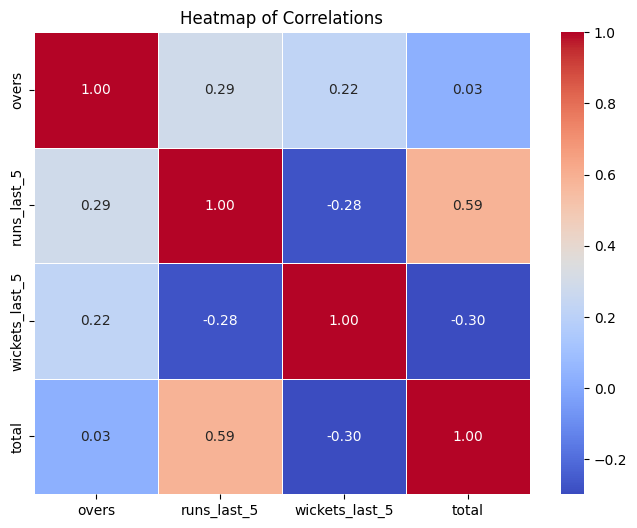

In [ ]:
features = ['overs', 'runs_last_5', 'wickets_last_5']
target = 'total'

# Drop rows with missing values
data_cleaned = data.dropna(subset=features + [target])

# Calculate correlation matrix
correlation_matrix = data_cleaned[features + [target]].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

Text(0.5, 1.0, 'Box Plot of Selected Features')

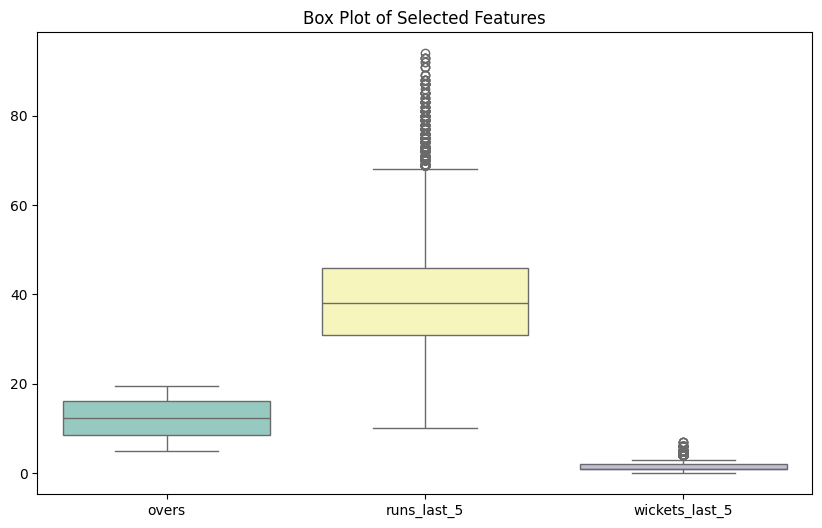

In [ ]:
# Select relevant columns for the box plot
features = ['overs', 'runs_last_5', 'wickets_last_5']

# Drop rows with missing values
data_cleaned = data.dropna(subset=features)

# Create box plots for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned[features], palette='Set3')
plt.title('Box Plot of Selected Features')

In [ ]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0, 1])],
                                      remainder='passthrough')

In [ ]:
data = np.array(columnTransformer.fit_transform(data))

In [ ]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(data, columns=cols)

In [ ]:
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


In [ ]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [ ]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


MODEL ALGORITHMS

In [ ]:
# Keeping track of model perfomances
models = dict()

1.DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [ ]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.99%
Test Score : 86.16%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 3.8409374220892545
Mean Squared Error (MSE): 120.18249813014211
Root Mean Squared Error (RMSE): 10.962777847340615


2.LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [ ]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 65.78%
Test Score : 66.49%


In [ ]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.857111160584553
Mean Squared Error (MSE): 291.1068856021046
Root Mean Squared Error (RMSE): 17.061854694086005


3.Random FOREST REGRESSION

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [ ]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.07%
Test Score : 93.34%


In [ ]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.38830569505289
Mean Squared Error (MSE): 57.78085098647596
Root Mean Squared Error (RMSE): 7.601371651647876


4.LASSO REGRESSION

In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
# Train Model
lasso.fit(train_features, train_labels)

LassoCV()

In [ ]:
# Evaluate Model
train_score_lasso = str(lasso.score(train_features, train_labels)*100)
test_score_lasso = str(lasso.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_lasso[:5]}%\nTest Score : {test_score_lasso[:5]}%')
models["lasso"] = test_score_lasso

Train Score : 64.74%
Test Score : 65.66%


In [ ]:
print("---- Lasso Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, lasso.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, lasso.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, lasso.predict(test_features)))))

---- Lasso Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.886937384838923
Mean Squared Error (MSE): 298.3057105422451
Root Mean Squared Error (RMSE): 17.271528899962654


5.SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [ ]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm

Train Score : 57.32%
Test Score : 57.83%


In [ ]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.545385313874396
Mean Squared Error (MSE): 366.29161474746326
Root Mean Squared Error (RMSE): 19.138746425705715


NEURAL NETWORKS

In [ ]:
# Define the neural network model
neural = keras.Sequential([
    keras.layers.Input( shape=(train_features.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
neural.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [ ]:
neural.fit(train_features, train_labels, epochs=50, batch_size=64, validation_data=(test_features, test_labels))

Epoch 1/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 37.2572 - val_loss: 20.1028
Epoch 2/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 18.4895 - val_loss: 14.5193
Epoch 3/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 14.4956 - val_loss: 12.1426
Epoch 4/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 12.8070 - val_loss: 11.8501
Epoch 5/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12.3222 - val_loss: 11.4525
Epoch 6/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12.2690 - val_loss: 12.2434
Epoch 7/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 12.1419 - val_loss: 11.3153
Epoch 8/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 12.0708 - val_loss: 11.8553
Epoch 9/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 11.7701 - val_loss: 11.1770
Epoch 10/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 11.8267 - val_loss: 12.6061
Epoch 11/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 11.5895 - val_loss: 11.0142
Epoch 12/50
502/502 ━━━━━━━━━━

In [ ]:
from sklearn.metrics import r2_score

# Get the model predictions
train_predictions = neural.predict(train_features)
test_predictions = neural.predict(test_features)

# Calculate R² score for both training and test sets
train_r2 = r2_score(train_labels, train_predictions)
test_r2 = r2_score(test_labels, test_predictions)

# Print R² scores
print(f'Train R² Score: {train_r2 * 100:.2f}%')
print(f'Test R² Score: {test_r2 * 100:.2f}%')

# Store the test score in the models dictionary
models["neural"] = test_r2 * 100



1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train R² Score: 80.73%
Test R² Score: 80.00%


In [ ]:
# Make predictions
predictions = neural.predict(test_features)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(test_labels ,predictions)

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


8.858444632333105

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'predictions' is the output of your model and 'y_test' is the actual values
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_labels, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R²) score
r2 = r2_score(test_labels, predictions)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 173.7603664373983
R-squared (R²): 0.799996793638091


In [ ]:
print(models)

{'tree': '86.1666469359844', 'linreg': '66.49275567945668', 'forest': '93.34925696776868', 'lasso': '65.6641501121538', 'svm': '57.838775944704615', 'neural': 79.9996793638091}


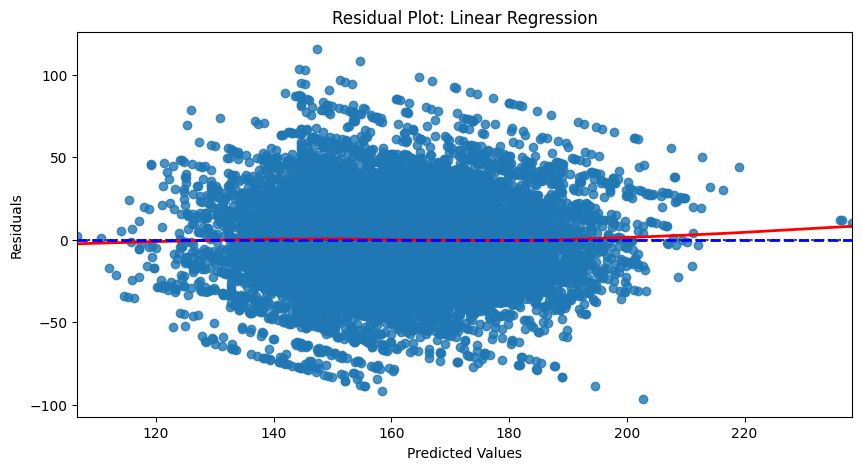

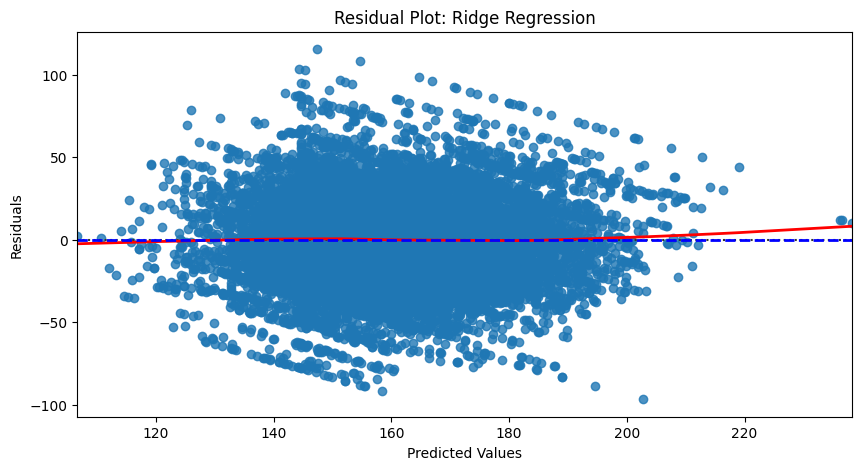

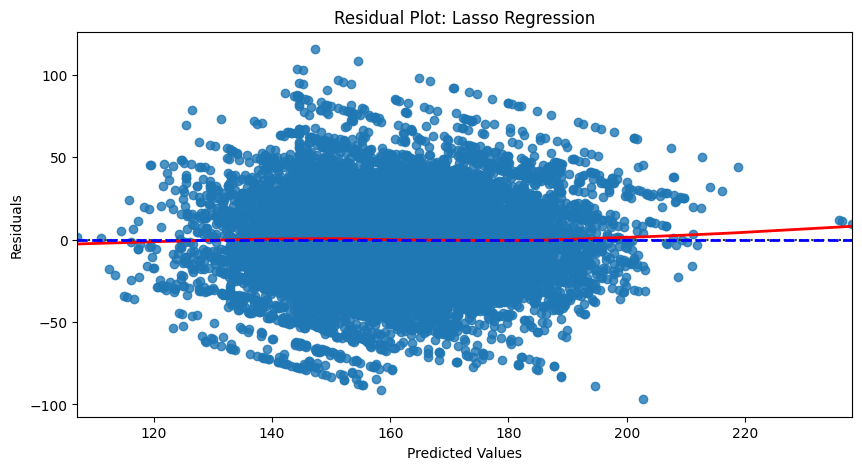

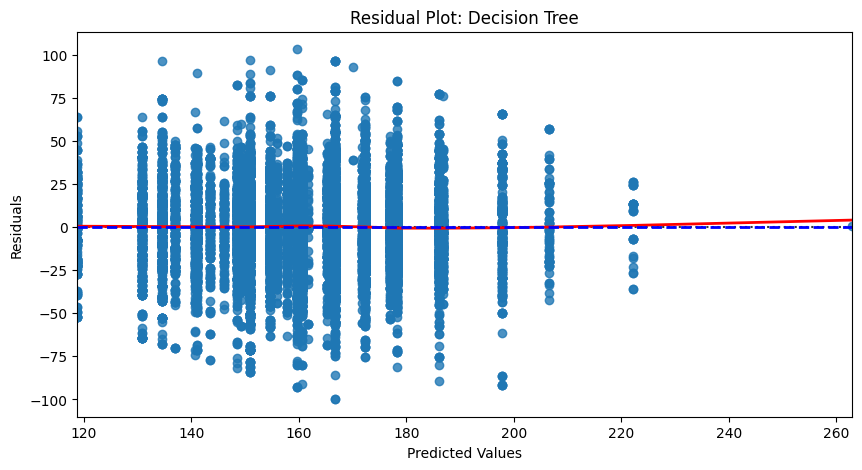

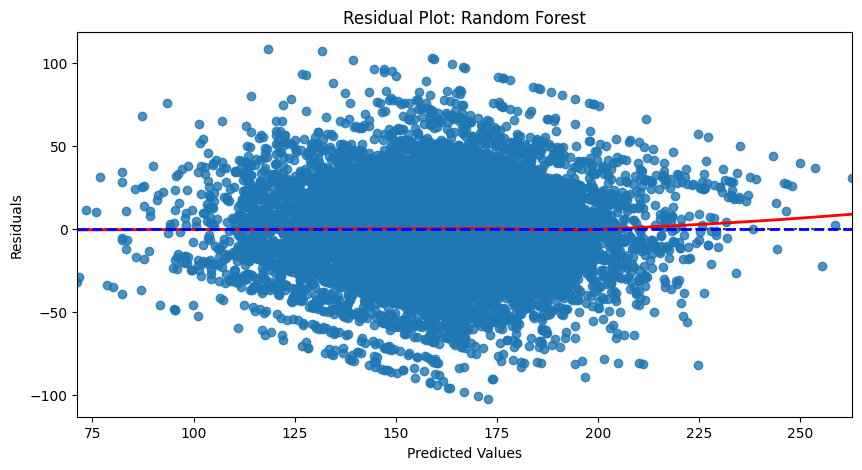

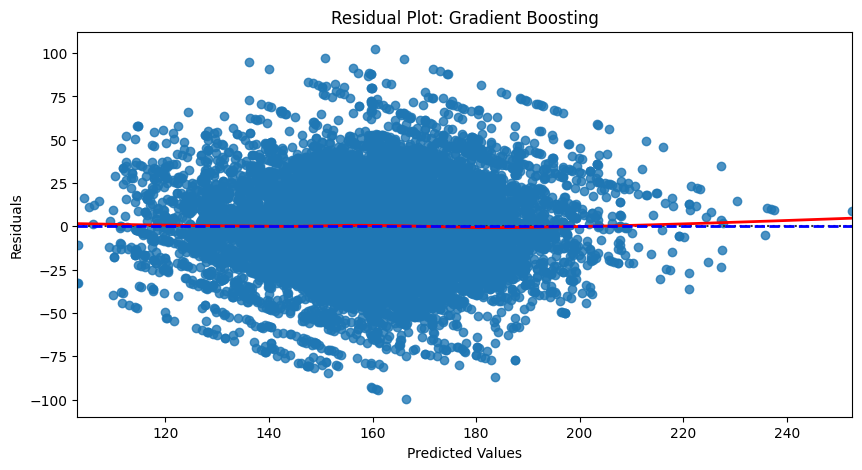

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the dataset
file_path = 'ipl_data.csv'
data = pd.read_csv(file_path)

# Select relevant columns for regression
features = ['overs', 'runs_last_5', 'wickets_last_5']
target = 'total'

# Drop rows with missing values
data_cleaned = data.dropna(subset=features + [target])

# Prepare independent and dependent variables
X = data_cleaned[features]
y = data_cleaned[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Iterate through models and plot residuals
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate residuals
    residuals = y_test - y_pred

    # Plot residuals
    plt.figure(figsize=(10, 5))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
    plt.title(f'Residual Plot: {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, color='blue', linestyle='--', lw=2)
    plt.show()

<ipython-input-64-113d4afe1edc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy, palette="Set2")


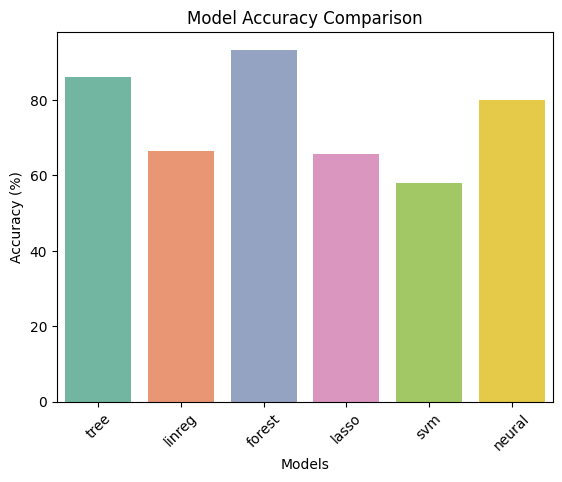

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'models' is a dictionary with model names as keys and accuracies as values
model_names = list(models.keys())
accuracy = list(map(float, models.values()))

# Use a built-in Seaborn color palette
sns.barplot(x=model_names, y=accuracy, palette="Set2")

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)  # Rotate model names if needed
plt.show()
